In [23]:
###numpy를 활용한 나만의 프로젝트 만들기
#3 광역시 데이터를 10년 단위로 살펴보면 청년 비율이 줄고 있다는 사실을 알 수 있을까?

"""
2008년부터 2020년까지 전체시군구현황을 기준으로 1세씩 나눠 데이터 추출

#광역시는 우선 대전광역시 대상

1)각 데이터에서 광역시 데이터만 추출
2)청년(15-25) 데이터와 그 외 데이터로 구분해서 산출
2)각 지역별로 기간을 나눠 concat
3)15-20 청년수/전체인구수로 청년비율 산출
4)그래프 생성
"""

'\n2008년부터 2020년까지 전체시군구현황을 기준으로 1세씩 나눠 데이터 추출\n\n#광역시는 우선 대전광역시 대상\n\n1)각 데이터에서 광역시 데이터만 추출\n2)청년(15-25) 데이터와 그 외 데이터로 구분해서 산출\n2)각 지역별로 기간을 나눠 concat\n3)15-20 청년수/전체인구수로 청년비율 산출\n4)그래프 생성\n'

In [24]:
#데이터 읽어오기
import pandas as pd
test1 = pd.read_csv('./data/청년비율/200812_200812_연령별인구현황_연간.csv', encoding='euc-kr')
test1.columns
test1

,행정구역,2008년_계_총인구수,2008년_계_연령구간인구수,2008년_계_0세,2008년_계_1세,2008년_계_2세,2008년_계_3세,2008년_계_4세,2008년_계_5세,2008년_계_6세,...,2008년_계_91세,2008년_계_92세,2008년_계_93세,2008년_계_94세,2008년_계_95세,2008년_계_96세,2008년_계_97세,2008년_계_98세,2008년_계_99세,2008년_계_100세 이상
0,전국 (0000000000),"49,540,367","49,540,367","444,421","491,498","446,884","434,320","472,935","492,914","494,660",...,"18,074","13,354","9,369","7,244","5,292","3,967","2,556","1,732","1,221","2,335"
1,서울특별시 (1100000000),"10,200,827","10,200,827","88,051","93,727","84,485","79,998","87,660","89,366","88,920",...,"3,139","2,263","1,667","1,294",927,693,428,328,226,411
2,부산광역시 (2600000000),"3,564,577","3,564,577","25,105","27,558","24,879","24,557","27,007","28,776","28,912",...,952,666,452,400,287,187,118,79,51,117
3,대구광역시 (2700000000),"2,492,724","2,492,724","19,558","21,960","20,105","20,269","22,084","23,944","24,032",...,682,481,349,283,177,125,85,44,42,86
4,인천광역시 (2800000000),"2,692,696","2,692,696","24,302","27,504","24,852","24,124","26,203","27,521","27,147",...,839,546,370,274,204,176,127,61,52,92
5,광주광역시 (2900000000),"1,422,702","1,422,702","13,306","15,083","13,888","13,600","14,953","16,413","16,371",...,429,337,226,212,113,108,81,44,36,66
6,대전광역시 (3000000000),"1,480,895","1,480,895","14,139","15,632","14,309","14,027","15,566","16,214","16,249",...,407,339,236,169,123,98,75,45,27,51
7,울산광역시 (3100000000),"1,112,407","1,112,407","10,958","12,075","10,809","10,451","11,130","11,719","11,666",...,269,175,116,89,61,47,17,18,12,16
8,경기도 (4100000000),"11,292,264","11,292,264","115,067","129,093","119,057","114,804","125,354","129,909","128,795",...,"3,283","2,417","1,731","1,264",933,673,477,347,233,405
9,강원도 (4200000000),"1,508,575","1,508,575","11,858","13,628","12,388","12,629","13,734","14,237","15,042",...,941,633,434,354,247,189,111,94,63,120


In [25]:
#빈리스트 생성
local_dict = {'부산광역시  (2600000000)':[], '대구광역시  (2700000000)':[], '인천광역시  (2800000000)':[],'광주광역시  (2900000000)':[],'대전광역시  (3000000000)':[], '울산광역시  (3100000000)':[]}
local_dict
#local_dict = pd.DataFrame(local_dict)

{'부산광역시  (2600000000)': [],
 '대구광역시  (2700000000)': [],
 '인천광역시  (2800000000)': [],
 '광주광역시  (2900000000)': [],
 '대전광역시  (3000000000)': [],
 '울산광역시  (3100000000)': []}

In [26]:
#test
for i in range(len(test1)):
    #print(test1.iloc[i,[0]][0])
    if test1.iloc[i,[0]][0] in local_dict:
        local_dict[test1.iloc[i,[0]][0]] = 0

local_dict

{'부산광역시  (2600000000)': 0,
 '대구광역시  (2700000000)': 0,
 '인천광역시  (2800000000)': 0,
 '광주광역시  (2900000000)': 0,
 '대전광역시  (3000000000)': 0,
 '울산광역시  (3100000000)': 0}

In [27]:
#지역
test1.iloc[:,[0]]

#2008년_계_15세부터 25세까지
young = test1.iloc[:,[18,19,20,21,22,23,24,25,26,27,28]]

#콤마 제거하고 숫자로 변환해서 sum
young_sum = sum([int(young.iloc[0][i].replace(',','')) for i in range(len(young.iloc[0]))])

#그외 나이들
#총인구수 - 청년인구수
int(test1.iloc[0,[1]][0].replace(',',''))-young_sum

#당해년도 전체인구대비 청년 비율구하기
young_rate=young_sum/int(test1.iloc[0,[1]][0].replace(',',''))*100
young_rate

14.759111493865195

In [28]:
test1.iloc[1,[0]][0]

'서울특별시  (1100000000)'

In [29]:
#총인구수
test1.iloc[1,[1]][0]

'10,200,827'

In [30]:
young

,2008년_계_15세,2008년_계_16세,2008년_계_17세,2008년_계_18세,2008년_계_19세,2008년_계_20세,2008년_계_21세,2008년_계_22세,2008년_계_23세,2008년_계_24세,2008년_계_25세
0,"710,578","724,687","701,323","637,985","628,225","621,920","613,160","622,919","648,375","657,761","744,785"
1,"133,649","138,416","136,284","125,541","125,239","128,283","127,714","134,483","146,808","153,900","180,693"
2,"49,223","51,317","50,324","45,807","47,280","46,722","46,412","47,878","50,015","51,508","57,381"
3,"38,452","39,246","38,280","34,915","35,090","33,163","32,725","32,902","33,371","32,976","37,566"
4,"42,109","43,055","41,924","37,936","36,803","35,888","34,931","35,151","36,589","36,484","41,084"
5,"23,966","24,110","22,582","20,254","19,654","19,243","18,999","18,922","19,729","20,088","22,598"
6,"23,010","23,446","22,817","20,667","20,229","20,207","19,824","20,169","20,975","21,116","23,258"
7,"18,732","18,883","18,467","16,185","15,920","14,740","14,148","14,029","14,083","14,431","16,074"
8,"169,543","171,324","164,068","146,379","140,672","137,894","132,346","133,233","139,123","140,773","160,192"
9,"20,379","20,666","19,857","18,739","18,498","18,563","18,449","18,723","19,074","18,569","20,240"


In [31]:
len(young.iloc[0])

11

In [32]:
young.iloc[0][1]

'724,687'

In [33]:
#청년인구수
#2008년_계_15세부터 25세까지
young = test1.iloc[:,[18,19,20,21,22,23,24,25,26,27,28]]
#콤마 제거하고 숫자로 변환해서 sum
young_sum = sum([int(young.iloc[0][i].replace(',','')) for i in range(len(young.iloc[0]))])
young_sum

7311718

In [34]:
test1

,행정구역,2008년_계_총인구수,2008년_계_연령구간인구수,2008년_계_0세,2008년_계_1세,2008년_계_2세,2008년_계_3세,2008년_계_4세,2008년_계_5세,2008년_계_6세,...,2008년_계_91세,2008년_계_92세,2008년_계_93세,2008년_계_94세,2008년_계_95세,2008년_계_96세,2008년_계_97세,2008년_계_98세,2008년_계_99세,2008년_계_100세 이상
0,전국 (0000000000),"49,540,367","49,540,367","444,421","491,498","446,884","434,320","472,935","492,914","494,660",...,"18,074","13,354","9,369","7,244","5,292","3,967","2,556","1,732","1,221","2,335"
1,서울특별시 (1100000000),"10,200,827","10,200,827","88,051","93,727","84,485","79,998","87,660","89,366","88,920",...,"3,139","2,263","1,667","1,294",927,693,428,328,226,411
2,부산광역시 (2600000000),"3,564,577","3,564,577","25,105","27,558","24,879","24,557","27,007","28,776","28,912",...,952,666,452,400,287,187,118,79,51,117
3,대구광역시 (2700000000),"2,492,724","2,492,724","19,558","21,960","20,105","20,269","22,084","23,944","24,032",...,682,481,349,283,177,125,85,44,42,86
4,인천광역시 (2800000000),"2,692,696","2,692,696","24,302","27,504","24,852","24,124","26,203","27,521","27,147",...,839,546,370,274,204,176,127,61,52,92
5,광주광역시 (2900000000),"1,422,702","1,422,702","13,306","15,083","13,888","13,600","14,953","16,413","16,371",...,429,337,226,212,113,108,81,44,36,66
6,대전광역시 (3000000000),"1,480,895","1,480,895","14,139","15,632","14,309","14,027","15,566","16,214","16,249",...,407,339,236,169,123,98,75,45,27,51
7,울산광역시 (3100000000),"1,112,407","1,112,407","10,958","12,075","10,809","10,451","11,130","11,719","11,666",...,269,175,116,89,61,47,17,18,12,16
8,경기도 (4100000000),"11,292,264","11,292,264","115,067","129,093","119,057","114,804","125,354","129,909","128,795",...,"3,283","2,417","1,731","1,264",933,673,477,347,233,405
9,강원도 (4200000000),"1,508,575","1,508,575","11,858","13,628","12,388","12,629","13,734","14,237","15,042",...,941,633,434,354,247,189,111,94,63,120


In [35]:
test1.iloc[0,[1]]

2008년_계_총인구수    49,540,367
Name: 0, dtype: object

In [36]:
re_test_data=test1.iloc[i,[1]].replace(',','')
test1.iloc[i,[1]][0].replace(',','')

'560618'

In [37]:
#재시도를 위한 빈리스트 생성
local_dict2008 = {'부산광역시  (2600000000)':[], '대구광역시  (2700000000)':[], '인천광역시  (2800000000)':[],'광주광역시  (2900000000)':[],'대전광역시  (3000000000)':[], '울산광역시  (3100000000)':[]}
local_dict2008

{'부산광역시  (2600000000)': [],
 '대구광역시  (2700000000)': [],
 '인천광역시  (2800000000)': [],
 '광주광역시  (2900000000)': [],
 '대전광역시  (3000000000)': [],
 '울산광역시  (3100000000)': []}

In [38]:
#당해 모든 광역시에 대해 청년비율 구하기

import pandas as pd
test1 = pd.read_csv('./data/청년비율/200812_200812_연령별인구현황_연간.csv', encoding='euc-kr')

for i in range(len(test1)):
    if test1.iloc[i,[0]][0] in local_dict:
        #2008년_계_15세부터 25세까지
        young = test1.iloc[:,[18,19,20,21,22,23,24,25,26,27,28]]
        #콤마 제거하고 숫자로 변환해서 sum
        young_sum = sum([int(young.iloc[i][j].replace(',','')) for j in range(len(young.iloc[0]))])
        #당해년도 전체인구대비 청년 비율구하기
        re_test1=test1.iloc[i,[1]][0].replace(',','')
        young_rate=(young_sum/int(re_test1))*100
        local_dict2008[test1.iloc[i,[0]][0]].append(young_rate)
        #print(test1.iloc[i,[0]][0], young_rate)

local_dict2008

{'부산광역시  (2600000000)': [15.257546687867872],
 '대구광역시  (2700000000)': [15.592821347249034],
 '인천광역시  (2800000000)': [15.670317035417291],
 '광주광역시  (2900000000)': [16.176613233129636],
 '대전광역시  (3000000000)': [15.917266247775839],
 '울산광역시  (3100000000)': [15.793859621523417]}

In [39]:
#각 기간별 리스트 대상
#2010년, 2020년
#모든해의 모든 광역시에 대해 청년비율 구하기

In [40]:
#2010년
local_dict2010 = {'부산광역시  (2600000000)':[], '대구광역시  (2700000000)':[], '인천광역시  (2800000000)':[],'광주광역시  (2900000000)':[],'대전광역시  (3000000000)':[], '울산광역시  (3100000000)':[]}
local_dict2010

import pandas as pd
test2010 = pd.read_csv('./data/청년비율/201012_201012_연령별인구현황_연간.csv', encoding='euc-kr')

for i in range(len(test2010)):
    if test2010.iloc[i,[0]][0] in local_dict:
        #2010년_계_15세부터 25세까지
        young = test2010.iloc[:,[18,19,20,21,22,23,24,25,26,27,28]]
        #콤마 제거하고 숫자로 변환해서 sum
        young_sum = sum([int(young.iloc[i][j].replace(',','')) for j in range(len(young.iloc[0]))])
        #당해년도 전체인구대비 청년 비율구하기
        re_test2010=test2010.iloc[i,[1]][0].replace(',','')
        young_rate=(young_sum/int(re_test2010))*100
        local_dict2010[test2010.iloc[i,[0]][0]].append(young_rate)
        print(test2010.iloc[i,[0]][0], young_rate)

local_dict2010

부산광역시  (2600000000) 14.688599207939662
대구광역시  (2700000000) 15.440845077151671
인천광역시  (2800000000) 15.52991412089203
광주광역시  (2900000000) 16.058037887141523
대전광역시  (3000000000) 15.76269698549676
울산광역시  (3100000000) 15.841722172995068


{'부산광역시  (2600000000)': [14.688599207939662],
 '대구광역시  (2700000000)': [15.440845077151671],
 '인천광역시  (2800000000)': [15.52991412089203],
 '광주광역시  (2900000000)': [16.058037887141523],
 '대전광역시  (3000000000)': [15.76269698549676],
 '울산광역시  (3100000000)': [15.841722172995068]}

In [41]:
#2020년 

local_dict2020 = {'부산광역시  (2600000000)':[], '대구광역시  (2700000000)':[], '인천광역시  (2800000000)':[],'광주광역시  (2900000000)':[],'대전광역시  (3000000000)':[], '울산광역시  (3100000000)':[]}
local_dict2020

import pandas as pd
test2020 = pd.read_csv('./data/청년비율/202012_202012_연령별인구현황_연간.csv', encoding='euc-kr')

for i in range(len(test2020)):
    if test2020.iloc[i,[0]][0] in local_dict:
        #2010년_계_15세부터 25세까지
        young = test2020.iloc[:,[18,19,20,21,22,23,24,25,26,27,28]]
        #콤마 제거하고 숫자로 변환해서 sum
        young_sum = sum([int(young.iloc[i][j].replace(',','')) for j in range(len(young.iloc[0]))])
        #당해년도 전체인구대비 청년 비율구하기
        re_test2020=test2020.iloc[i,[1]][0].replace(',','')
        young_rate=(young_sum/int(re_test2020))*100
        local_dict2020[test2010.iloc[i,[0]][0]].append(young_rate)
        print(test2020.iloc[i,[0]][0], young_rate)

local_dict2020

부산광역시  (2600000000) 11.572825746636296
대구광역시  (2700000000) 12.943764043689365
인천광역시  (2800000000) 12.485133347922476
광주광역시  (2900000000) 14.553515642779413
대전광역시  (3000000000) 13.852755891526778
울산광역시  (3100000000) 12.50236572163973


{'부산광역시  (2600000000)': [11.572825746636296],
 '대구광역시  (2700000000)': [12.943764043689365],
 '인천광역시  (2800000000)': [12.485133347922476],
 '광주광역시  (2900000000)': [14.553515642779413],
 '대전광역시  (3000000000)': [13.852755891526778],
 '울산광역시  (3100000000)': [12.50236572163973]}

In [42]:
print(local_dict2010)
print('===========')
print(local_dict2020)

{'부산광역시  (2600000000)': [14.688599207939662], '대구광역시  (2700000000)': [15.440845077151671], '인천광역시  (2800000000)': [15.52991412089203], '광주광역시  (2900000000)': [16.058037887141523], '대전광역시  (3000000000)': [15.76269698549676], '울산광역시  (3100000000)': [15.841722172995068]}
{'부산광역시  (2600000000)': [11.572825746636296], '대구광역시  (2700000000)': [12.943764043689365], '인천광역시  (2800000000)': [12.485133347922476], '광주광역시  (2900000000)': [14.553515642779413], '대전광역시  (3000000000)': [13.852755891526778], '울산광역시  (3100000000)': [12.50236572163973]}


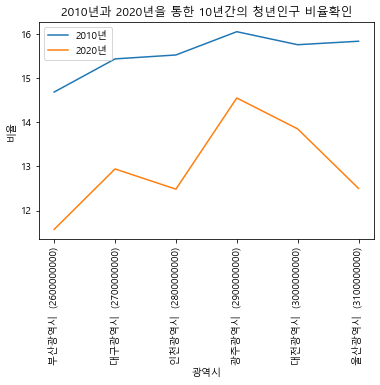

In [43]:
#그래프로 나타내기
import matplotlib.pyplot as plt
#한글 폰트 사용시 마이너스 부호 표현하기
plt.rcParams['axes.unicode_minus']=False
plt.rc('font', family='Malgun Gothic')
plt.title('2010년과 2020년을 통한 10년간의 청년인구 비율확인')
plt.plot(local_dict2010.values(),label= '2010년')
plt.plot(local_dict2020.values(), label='2020년')
plt.legend()
plt.xlabel('광역시')
plt.ylabel('비율')
plt.xticks(range(6), local_dict2010.keys(), rotation=90)
plt.show()

In [44]:
#############################################################################

In [45]:
#4번 
#서울에서 지난 5년간 가장 많이 증가한 구는 어디일까
"""

2016년도부터 2020년도까지의 인구데이터를 대상으로 광역시까지 나와있는 데이터 추출
2016년 총 인구수와 2020년 총인구수를 가져와 차이를 구하고
각 지역별 인구증감을 그래프로 확인
"""

'\n\n2016년도부터 2020년도까지의 인구데이터를 대상으로 광역시까지 나와있는 데이터 추출\n2016년 총 인구수와 2020년 총인구수를 가져와 차이를 구하고\n각 지역별 인구증감을 그래프로 확인\n'

In [46]:
#데이터 읽어오기 2016
import pandas as pd
test1 = pd.read_csv('./data/서울 인구증가/201612_201612_연령별인구현황_연간.csv', encoding='euc-kr')
test1.columns
test1

#우리가 필요한 것은 구 데이터만 이므로 시 데이터는 삭제
test1=test1[1:]
#총인구수만 추출
test1.iloc[:,[0,1]]

,행정구역,2016년_계_총인구수
1,서울특별시 종로구 (1111000000),"152,737"
2,서울특별시 중구 (1114000000),"125,249"
3,서울특별시 용산구 (1117000000),"230,241"
4,서울특별시 성동구 (1120000000),"299,259"
5,서울특별시 광진구 (1121500000),"357,215"
6,서울특별시 동대문구 (1123000000),"355,069"
7,서울특별시 중랑구 (1126000000),"411,005"
8,서울특별시 성북구 (1129000000),"450,355"
9,서울특별시 강북구 (1130500000),"327,195"
10,서울특별시 도봉구 (1132000000),"348,220"


In [47]:
#데이터 읽어오기 2020
import pandas as pd
test2 = pd.read_csv('./data/서울 인구증가/202012_202012_연령별인구현황_연간.csv', encoding='euc-kr')
test2.columns
test2

#우리가 필요한 것은 구 데이터만 이므로 시 데이터는 삭제
test2=test2[1:]

#총인구수만 추출
test2.iloc[:,[0,1]]

,행정구역,2020년_계_총인구수
1,서울특별시 종로구 (1111000000),"149,384"
2,서울특별시 중구 (1114000000),"125,240"
3,서울특별시 용산구 (1117000000),"230,040"
4,서울특별시 성동구 (1120000000),"293,556"
5,서울특별시 광진구 (1121500000),"346,682"
6,서울특별시 동대문구 (1123000000),"342,837"
7,서울특별시 중랑구 (1126000000),"394,702"
8,서울특별시 성북구 (1129000000),"437,153"
9,서울특별시 강북구 (1130500000),"308,055"
10,서울특별시 도봉구 (1132000000),"325,257"


In [48]:
#concat
total_df = pd.DataFrame(test1.iloc[:,[0,1]])
total_df

,행정구역,2016년_계_총인구수
1,서울특별시 종로구 (1111000000),"152,737"
2,서울특별시 중구 (1114000000),"125,249"
3,서울특별시 용산구 (1117000000),"230,241"
4,서울특별시 성동구 (1120000000),"299,259"
5,서울특별시 광진구 (1121500000),"357,215"
6,서울특별시 동대문구 (1123000000),"355,069"
7,서울특별시 중랑구 (1126000000),"411,005"
8,서울특별시 성북구 (1129000000),"450,355"
9,서울특별시 강북구 (1130500000),"327,195"
10,서울특별시 도봉구 (1132000000),"348,220"


In [49]:
#반드시 리스트 형식으로 넣어줘야 함
total_df=pd.concat([total_df, test2.iloc[:,[1]]], axis=1)

minus_list = []

for i in range(len(total_df)):
    minus_list.append(int(total_df.iloc[i][1].replace(',','')) - int(total_df.iloc[i][2].replace(',','')))

minus_list    

[3353,
 9,
 201,
 5703,
 10533,
 12232,
 16303,
 13202,
 19140,
 22963,
 44544,
 11641,
 2021,
 8002,
 23488,
 15300,
 13143,
 3653,
 -8867,
 9777,
 11791,
 22066,
 27884,
 -10129,
 -15802]

In [50]:
len(minus_list)
#기존의 total_df에는 서울특별시 전체에 대한 인구수도 있으므로 수를 맞추기 위해 
#리스트에 0추가
minus_list.insert(0,0)
minus_list

[0,
 3353,
 9,
 201,
 5703,
 10533,
 12232,
 16303,
 13202,
 19140,
 22963,
 44544,
 11641,
 2021,
 8002,
 23488,
 15300,
 13143,
 3653,
 -8867,
 9777,
 11791,
 22066,
 27884,
 -10129,
 -15802]

In [51]:
new_concat = pd.Series(minus_list, name = '증감')
total_df=pd.concat([total_df, new_concat], axis=1)
total_df

,행정구역,2016년_계_총인구수,2020년_계_총인구수,증감
0,NaN,NaN,NaN,0
1,서울특별시 종로구 (1111000000),"152,737","149,384",3353
2,서울특별시 중구 (1114000000),"125,249","125,240",9
3,서울특별시 용산구 (1117000000),"230,241","230,040",201
4,서울특별시 성동구 (1120000000),"299,259","293,556",5703
5,서울특별시 광진구 (1121500000),"357,215","346,682",10533
6,서울특별시 동대문구 (1123000000),"355,069","342,837",12232
7,서울특별시 중랑구 (1126000000),"411,005","394,702",16303
8,서울특별시 성북구 (1129000000),"450,355","437,153",13202
9,서울특별시 강북구 (1130500000),"327,195","308,055",19140


In [52]:
total_df=total_df[1:]

In [53]:
total_df.iloc[:,[3]]

,증감
1,3353
2,9
3,201
4,5703
5,10533
6,12232
7,16303
8,13202
9,19140
10,22963


In [54]:
total_df.iloc[:, [0]]
list(total_df.iloc[:, 0])

['서울특별시 종로구 (1111000000)',
 '서울특별시 중구 (1114000000)',
 '서울특별시 용산구 (1117000000)',
 '서울특별시 성동구 (1120000000)',
 '서울특별시 광진구 (1121500000)',
 '서울특별시 동대문구 (1123000000)',
 '서울특별시 중랑구 (1126000000)',
 '서울특별시 성북구 (1129000000)',
 '서울특별시 강북구 (1130500000)',
 '서울특별시 도봉구 (1132000000)',
 '서울특별시 노원구 (1135000000)',
 '서울특별시 은평구 (1138000000)',
 '서울특별시 서대문구 (1141000000)',
 '서울특별시 마포구 (1144000000)',
 '서울특별시 양천구 (1147000000)',
 '서울특별시 강서구 (1150000000)',
 '서울특별시 구로구 (1153000000)',
 '서울특별시 금천구 (1154500000)',
 '서울특별시 영등포구 (1156000000)',
 '서울특별시 동작구 (1159000000)',
 '서울특별시 관악구 (1162000000)',
 '서울특별시 서초구 (1165000000)',
 '서울특별시 강남구 (1168000000)',
 '서울특별시 송파구 (1171000000)',
 '서울특별시 강동구 (1174000000)']

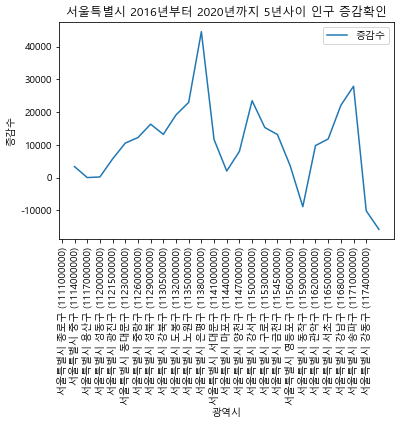

In [55]:
#그래프로 나타내기
#한글 폰트 사용시 마이너스 부호 표현하기
plt.rcParams['axes.unicode_minus']=False

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.title('서울특별시 2016년부터 2020년까지 5년사이 인구 증감확인')
#-이면 오히려 감소한 것임
plt.plot(total_df.iloc[:,[3]],label='증감수')
plt.legend()
plt.xlabel('광역시')
plt.ylabel('증감수')
plt.xticks(range(25), list(total_df.iloc[:, 0]), rotation=90)
plt.show()

#아래 광역시x축을 한칸뒤로 미는 법을 모르겠음.